In [7]:
%load_ext autoreload
%autoreload 2

In [17]:
import networkx as nx
from pyciemss.visuals import plots, vega


In [9]:
g = nx.generators.barabasi_albert_graph(5, 3)

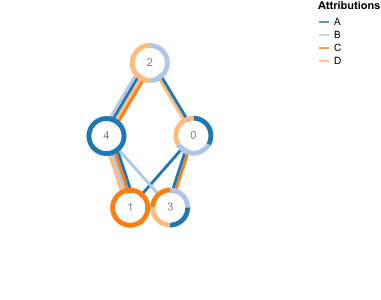

In [10]:
import random
def rand_attributions():
    possible = "ABCD"
    return random.sample(possible, random.randint(1, len(possible)))

def rand_label():
    possible = "TUVWXYZ"
    return random.randint(1, 10)
    return random.sample(possible, 1)[0]

node_properties = {n: {"attribution": rand_attributions(), 
                       "label": rand_label()}
                    for n in g.nodes()}

edge_attributions = {e: {"attribution": rand_attributions()} for e in g.edges()}

nx.set_node_attributes(g, node_properties)
nx.set_edge_attributes(g, edge_attributions)

schema = plots.attributed_graph(g)
plots.save_schema(schema, "_schema.json")
plots.ipy_display(schema)

In [11]:
g = nx.generators.barabasi_albert_graph(5, 3)
def rand_group():
    possible = "TUVWXYZ"
    return random.sample(possible, 1)[0]

node_properties = {n: {"group": rand_group(), 
                       "fx": random.randint(1, 100),
                       "fy": random.randint(1, 100)}
                    for n in g.nodes()}

edge_attributions = {e: {"group": rand_group()}
                    for e in g.edges()}

nx.set_node_attributes(g, node_properties)
nx.set_edge_attributes(g, edge_attributions)
nx.set_node_attributes(g, {k:f"n{i}" for i, k in enumerate(g.nodes)}, "label")

schema = plots.spring_force_graph(g, node_labels="label", input_layout = False)
plots.save_schema(schema, "_schema.json")
plots.ipy_display(schema, format="interactive")

In [21]:
import pandas as pd
import numpy as np

df = pd.DataFrame(3*np.random.random((100, 2)), columns=['test4', 'test5'])
schema = plots.heatmap_scatter(data = df, x_bin=4, y_bin=4, x_name = "test4", y_name = "test5")
plots.save_schema(schema, "_schema.json")
plots.ipy_display(schema, format="interactive")

In [7]:
import numpy as np
import pandas as pd
nx, ny = (10, 5)
x = np.linspace(0, 1, nx)
y, a = np.linspace(0, 1, ny, retstep = True)
print(y)
print(a)
xv, yv = np.meshgrid(x, y)
zz = np.sqrt(xv**2 + yv**2)

def mesh_to_heatmap(xv, yv, zz):
    end_x = (xv[0, 1] - xv[0, 0])/2
    end_y = (yv[1, 0] - yv[0, 0])/2
    dataset = pd.DataFrame({"x_start": xv.ravel() - end_x, \
                            "x_end": xv.ravel() + end_x, \
                                "y_start": yv.ravel() - end_y,     
                                "y_start": yv.ravel() + end_y,
                                '__count': zz.ravel()})
    return dataset.to_json(orient="records")
    
mesh_to_heatmap(xv, yv, zz)

[0.   0.25 0.5  0.75 1.  ]
0.25


'[{"x_start":-0.0555555556,"x_end":0.0555555556,"y_start":0.125,"__count":0.0},{"x_start":0.0555555556,"x_end":0.1666666667,"y_start":0.125,"__count":0.1111111111},{"x_start":0.1666666667,"x_end":0.2777777778,"y_start":0.125,"__count":0.2222222222},{"x_start":0.2777777778,"x_end":0.3888888889,"y_start":0.125,"__count":0.3333333333},{"x_start":0.3888888889,"x_end":0.5,"y_start":0.125,"__count":0.4444444444},{"x_start":0.5,"x_end":0.6111111111,"y_start":0.125,"__count":0.5555555556},{"x_start":0.6111111111,"x_end":0.7222222222,"y_start":0.125,"__count":0.6666666667},{"x_start":0.7222222222,"x_end":0.8333333333,"y_start":0.125,"__count":0.7777777778},{"x_start":0.8333333333,"x_end":0.9444444444,"y_start":0.125,"__count":0.8888888889},{"x_start":0.9444444444,"x_end":1.0555555556,"y_start":0.125,"__count":1.0},{"x_start":-0.0555555556,"x_end":0.0555555556,"y_start":0.375,"__count":0.25},{"x_start":0.0555555556,"x_end":0.1666666667,"y_start":0.375,"__count":0.2735793834},{"x_start":0.1666666